In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import pandas as pd

In [3]:
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [4]:
death_df = pd.read_csv("time_series_covid19_deaths_global.csv")
death_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [5]:
recovered_df = pd.read_csv("time_series_covid19_recovered_global.csv")
recovered_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [9]:
India_confirmed = confirmed_df[confirmed_df['Country/Region'] == 'India']
India_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
143,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,4754356,4846427,4930236,5020359,5118253,5214677,5308014,5400619,5487580,5487580


In [8]:
India_confirmed.info

<bound method DataFrame.info of     Province/State Country/Region        Lat      Long  1/22/20  1/23/20  \
143            NaN          India  20.593684  78.96288        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  9/14/20  \
143        0        0        0        0  ...  4754356  4846427  4930236   

     9/15/20  9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
143  5020359  5118253  5214677  5308014  5400619  5487580  5487580  

[1 rows x 248 columns]>

In [31]:
# total confirm cases India
tmp = India_confirmed.iloc[:,4:]
data = tmp.T
data = data.rename(columns={143 : 'Confirmed_Ind'},inplace = False)
data

,Confirmed_Ind
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
9/17/20,5214677
9/18/20,5308014
9/19/20,5400619
9/20/20,5487580


<AxesSubplot:>

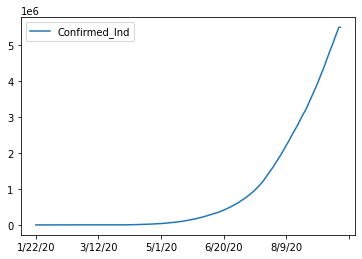

In [32]:
data.plot() 

In [34]:
#Check for Data stationary 
#If p< 0.05 ; Data is stationary
#if p>0.05; Data is not stationary

from statsmodels.tsa.stattools import adfuller
def ad_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
        
ad_test(data['Confirmed_Ind'])

1. ADF :  -2.306830176022341
2. P-Value :  0.16977456577420363
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression: 228
5. Critical Values :
	 1% :  -3.4593607492757554
	 5% :  -2.8743015807562924
	 10% :  -2.5735714042782396


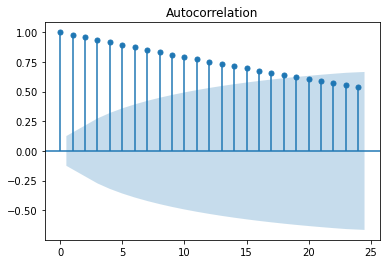

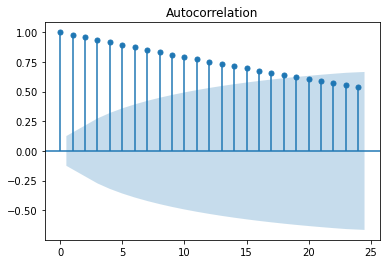

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

## Arima Model

In [73]:
# Test train data split 
print(data.shape)
train=data.iloc[:220] #220 data
test=data.iloc[220:] #24 data
predictions = []
print(test.shape)
print(train.shape)

(244, 1)
(24, 1)
(220, 1)


In [38]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq
    

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 6650.479469998995
(0, 0, 1) 6358.805471910505
(0, 0, 2) 6072.740353886215
(0, 0, 3) 5797.485862253349
(0, 0, 4) 5630.9324465725385
(0, 1, 0) 5011.06533368696
(0, 1, 1) 4739.060202379303
(0, 1, 2) 4564.4009745544845
(0, 1, 4) 4358.411314500598
(0, 2, 0) 4086.557274871465
(0, 2, 1) 4072.9005525824914
(0, 2, 2) 4063.958751087235
(0, 2, 3) 4064.9610040135863
(0, 2, 4) 4037.4766373130487
(1, 0, 0) 5143.866049926505
(1, 1, 0) 4115.684689885103
(1, 2, 0) 4079.3684047389947
(1, 2, 1) 4064.808271709718
(1, 2, 2) 4065.4998296634662
(1, 2, 3) 4044.484434495017
(1, 2, 4) 4027.995426206847
(2, 1, 0) 4110.2873394114595
(2, 2, 0) 4074.7151358273422
(2, 2, 1) 4064.385426786166
(2, 2, 2) 4009.375796140632
(3, 1, 0) 4107.882906305883
(3, 2, 0) 4068.2290023135624
(3, 2, 1) 4057.893038023158
(4, 1, 0) 4117.131957905056
(4, 2, 0) 4055.5285721930973
(4, 2, 1) 4050.7057408012806
(4, 2, 2) 3999.3063277854426
(4, 2, 4) 3978.7881767071203


In [42]:
model_arima = ARIMA(train,order=(4,2,4)) # p d q (past,int,errors)
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

3978.7881767071203


In [43]:
predictions = model_arima_fit.forecast(steps=24)[0]
predictions

array([3536228.79546081, 3600188.64509254, 3660000.95621163,
       3726701.0565301 , 3805453.15189454, 3890303.2717899 ,
       3971763.37458466, 4045365.52499219, 4112828.06632613,
       4178964.71197244, 4248951.28092142, 4325916.04721333,
       4408675.0685726 , 4492046.48104891, 4570683.84892293,
       4643224.86254231, 4712992.40570995, 4785092.88584712,
       4862749.5253523 , 4945455.80170189, 5029668.91553544,
       5111295.73667149, 5188414.9209048 , 5262489.87223457])

In [44]:
test.shape

(24, 1)

In [45]:
predictions.shape

(24,)

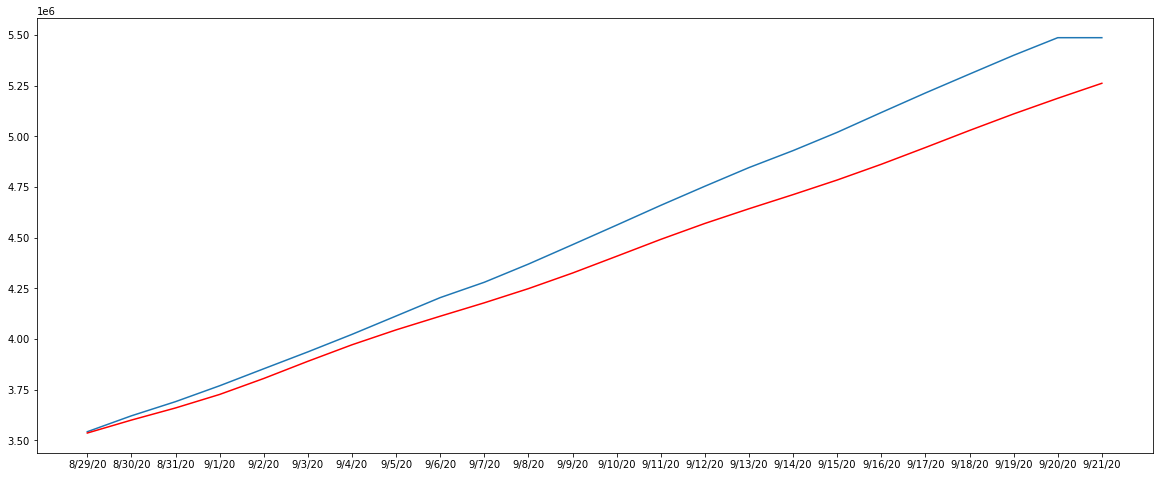

In [46]:
plt.figure(figsize = (20,8))
plt.plot(test)
plt.plot(predictions,color='red')

In [48]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

  
mse = mean_squared_error(test.Confirmed_Ind, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 175188.468481


## AR Model 

In [98]:
df_diff =data.diff(periods=1)
df_diff.head()

,Confirmed_Ind
1/22/20,NaN
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0


In [99]:
df_diff = df_diff[1:]
df_diff.head()

,Confirmed_Ind
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
1/27/20,0.0


<AxesSubplot:>

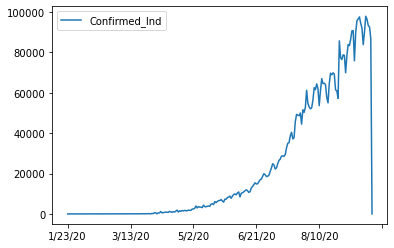

In [100]:
df_diff.plot()

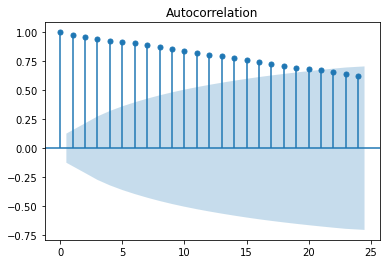

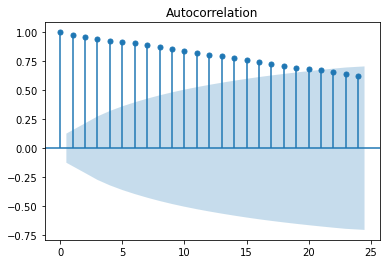

In [101]:
plot_acf(df_diff)

In [102]:
df_diff.shape

(243, 1)

In [103]:
train = df_diff[:220]
test = df_diff[220:]

In [104]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [105]:
predictions = model_ar_fit.predict(start=220,end=242)
predictions

2020-08-30     71409.701627
2020-08-31     63620.444339
2020-09-01     73982.314670
2020-09-02     88685.593251
2020-09-03     93347.806268
2020-09-04     89235.579449
2020-09-05     84261.206374
2020-09-06     78990.744856
2020-09-07     77214.671773
2020-09-08     78235.340454
2020-09-09    100937.500473
2020-09-10    107996.162593
2020-09-11     99617.932565
2020-09-12     92696.956975
2020-09-13     88386.344695
2020-09-14     83345.718434
2020-09-15     91516.720081
2020-09-16    110504.843349
2020-09-17    121409.139916
2020-09-18    114633.865392
2020-09-19    101306.112913
2020-09-20     93997.799145
2020-09-21     95383.113737
Freq: D, dtype: float64

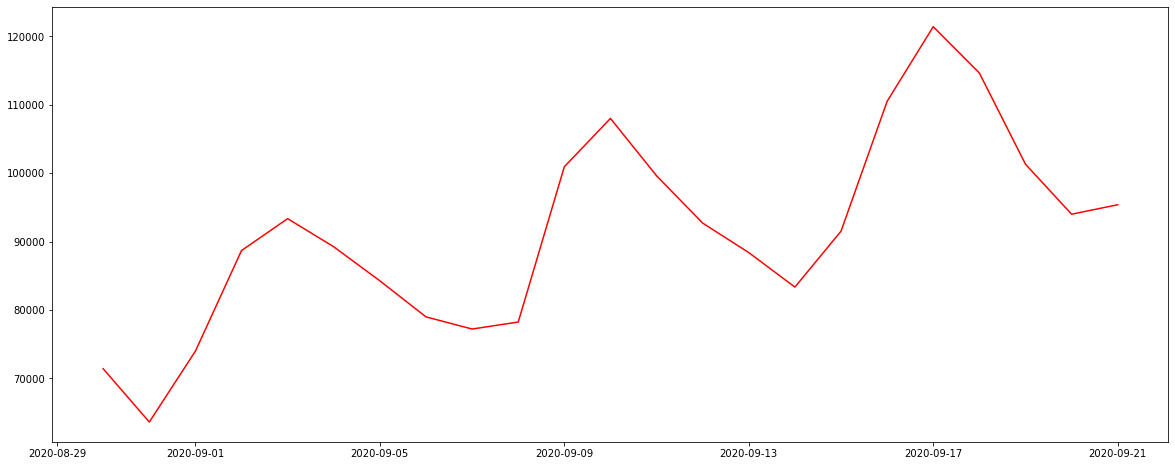

In [109]:
plt.figure(figsize = (20,8))
plt.plot(predictions,color='red')


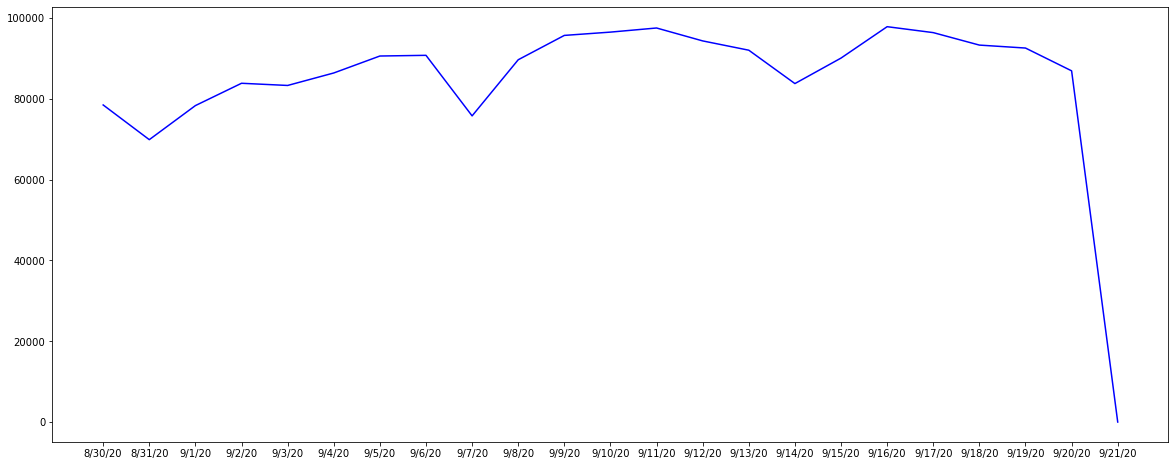

In [107]:
plt.figure(figsize = (20,8))
plt.plot(test,C)

In [110]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

  
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 22061.954298
